In [15]:
import pandas as pd

path = '/Users/yuchm001/Downloads/CaseCountData (3).xlsx'
df = pd.read_excel(path, sheet_name='Hospitalization by Day', header=1, skipfooter=2, index_col=0) \
    .dropna()

In [16]:
df.tail()

,Date,Hospitalizations
Obs,,
67,2020-06-09,2056
68,2020-06-10,2153
69,2020-06-11,2008
70,2020-06-12,2166
71,2020-06-13,2242


In [22]:
df['Hospitalizations.1'] = df['Hospitalizations'].shift(1)
df = df.dropna()


In [40]:
df['new_hos'] = df['Hospitalizations'] - df['Hospitalizations.1']
df['new_hos.1'] = df['new_hos'].shift(1)
df['new_high'] = df['new_hos'] > df['new_hos.1']

df['new_high'].sum()
df.shape[0]

70

In [41]:
df[df['new_hos'] == df['new_hos'].max()]

,Date,Hospitalizations,Hospitalizations.1,new_hos,new_hos.1,hew_high,new_high
Obs,,,,,,,
32,2020-05-05,1888,1533.0,355.0,-7.0,True,True


In [43]:
df.tail(10)

,Date,Hospitalizations,Hospitalizations.1,new_hos,new_hos.1,hew_high,new_high
Obs,,,,,,,
62,2020-06-04,1796,1799.0,-3.0,26.0,False,False
63,2020-06-05,1855,1796.0,59.0,-3.0,True,True
64,2020-06-06,1822,1855.0,-33.0,59.0,False,False
65,2020-06-07,1878,1822.0,56.0,-33.0,True,True
66,2020-06-08,1935,1878.0,57.0,56.0,True,True
67,2020-06-09,2056,1935.0,121.0,57.0,True,True
68,2020-06-10,2153,2056.0,97.0,121.0,False,False
69,2020-06-11,2008,2153.0,-145.0,97.0,False,False
70,2020-06-12,2166,2008.0,158.0,-145.0,True,True


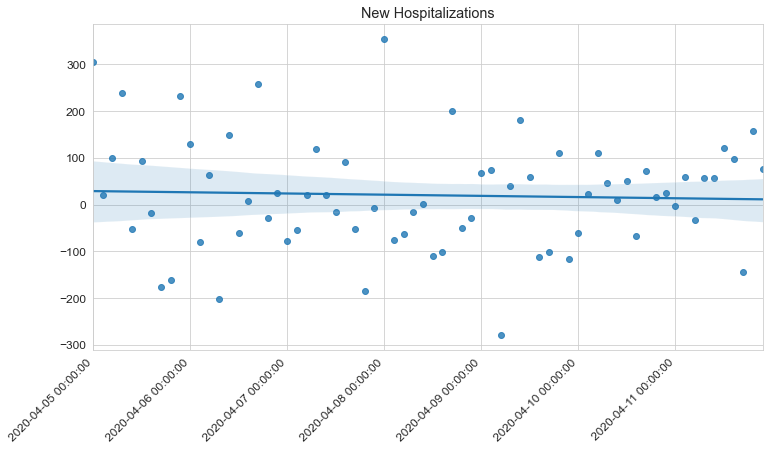

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
import numpy as np

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize = (12,6))  


sns.regplot(x=np.arange(0,df.shape[0]), y=df['new_hos'])

plt.title('New Hospitalizations', fontweight='light', fontsize='x-large')


# Y axis
# ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(float(x), '.2%')))
plt.ylabel('', fontweight='light', fontsize='large')
plt.yticks(
    fontweight='light',
    fontsize='large'  
);


# X axis
ax.set_xticklabels(df['Date'])
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
plt.xlabel('', fontweight='light', fontsize='large')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
);

# print('Latest value: {:.2%}'.format(df['positive_pct'].iloc[-1]))